In [1]:
import os
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from insightface.app import FaceAnalysis

# inference

In [95]:
app = FaceAnalysis(name="buffalo_s" , providers=["CPUExecutionProvider"])
app.prepare(ctx_id=0 , det_size=(640,640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Lenovo/.insightface\models\buffalo_s\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Lenovo/.insightface\models\buffalo_s\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Lenovo/.insightface\models\buffalo_s\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Lenovo/.insightface\models\buffalo_s\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Lenovo/.insightface\models\buffalo_s\w600k_mbf.onnx recognition ['None', 3, 112, 112

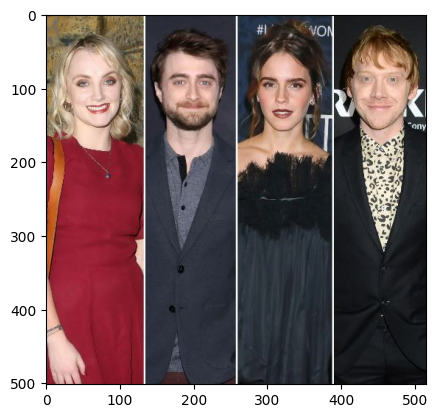

In [178]:
# test image 

input_image = cv2.imread("group_1.JPG")
input_image = cv2.cvtColor(input_image , cv2.COLOR_BGR2RGB)
plt.imshow(input_image)


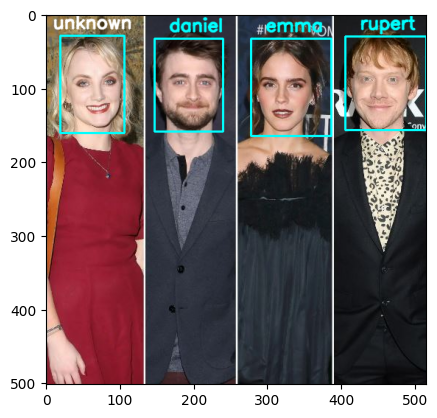

In [182]:
results = app.get(input_image)
face_bank = np.load("face_bank.npy" , allow_pickle=True )


result_image = input_image.copy()
counter =0
for result in results :
    for person in face_bank:
        facebank_person_embedding = person["embedding"]
        new_person_embedding = result["embedding"]
        distance = np.sqrt(np.sum((facebank_person_embedding - new_person_embedding)**2))
        if distance < 25 :
            if counter <= 1 :
                cv2.rectangle(result_image , (int(result.bbox[0])-10 , int(result.bbox[1])-20 , int(result.bbox[2])-250 , int(result.bbox[3])-25) , (0 , 255 , 255) , 2)
                cv2.putText(result_image , person["name"] , (int(result.bbox[0]) + 10 , int(result.bbox[1]) -30 ) , 
                cv2.FONT_HERSHEY_SIMPLEX , 0.8  , (0 , 255, 255) ,  2 , cv2.LINE_AA )
            
            else :
                cv2.rectangle(result_image , (int(result.bbox[0])-10 , int(result.bbox[1])-20 , int(result.bbox[2])-140 , int(result.bbox[3])-25) , (0 , 255 , 255) , 2)
                cv2.putText(result_image , person["name"] , (int(result.bbox[0]) + 10 , int(result.bbox[1]) -30 ) , 
                cv2.FONT_HERSHEY_SIMPLEX , 0.8  , (0 , 255, 255) ,  2 , cv2.LINE_AA )
            
            break
    else :
            cv2.rectangle(result_image , (int(result.bbox[0])-10 , int(result.bbox[1])-20 , int(result.bbox[2])-15 , int(result.bbox[3])-20) , (0 , 255 , 255) , 2)
            cv2.putText(result_image , "unknown" , (int(result.bbox[0]) - 20 , int(result.bbox[1]) -30 ) , 
                cv2.FONT_HERSHEY_SIMPLEX , 0.8  , (255 , 255, 255) ,  2 , cv2.LINE_AA )
    counter+=1
plt.imshow(result_image)